In [1]:
import tensorflow as tf
from tensorflow import keras ## Keras is high-level API for tensorflow to write NN code 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Store the fashion mnist data in a variable - keras has couple of datasets
data = keras.datasets.fashion_mnist

In [3]:
#Split the data into train and test sets
#NOTE: loading the dataset returns 4 numpy arrays for train and test sets
(train_images, train_labels), (test_images, test_labels) = data.load_data()


# Explore the data

In [4]:
np.unique(train_labels)
## This shows us that there are 10 labels in total

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [5]:
## Define the actual labels for each of the numbers in the train_labels data
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
print(train_images.shape)
print(train_images.dtype)  ## type of data in numpy array can be checked by using np_array.dtype
#There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

(60000, 28, 28)
uint8


In [7]:
print(test_images.shape)
print(test_images.dtype)

(10000, 28, 28)
uint8


In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

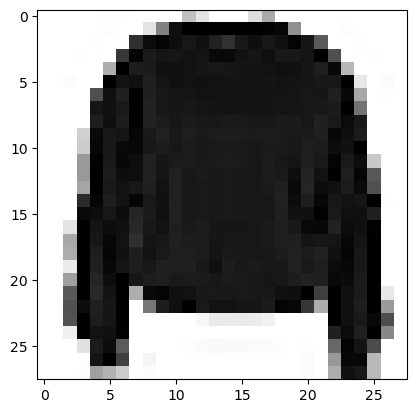

In [10]:
## Check the image
plt.imshow(train_images[7], cmap = plt.cm.binary)
plt.show()

In [11]:
## Check the corresponding data
print(train_images[7])
## The data has numbers that correspond to pixels on RGB scale

[[  0   0   0   0   0   1   1   0   0   0   0  63  28   0   0   0  33  85
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   2   0   0  28 126 241 255 255 255 255 255 255 252
  248 111   0   0   0   2   0   0   0   0]
 [  0   0   0   0   2   0   0 206 244 251 241 230 238 221 205 230 240 230
  239 251 233 165   0   0   2   0   0   0]
 [  0   0   0   1   0   0 199 251 228 234 233 236 235 245 247 237 234 239
  230 230 235 255 176   0   0   1   0   0]
 [  0   0   0   0   0  81 254 226 228 239 237 236 234 232 233 235 235 236
  239 237 233 225 246  73   0   0   0   0]
 [  0   0   3   0   0 255 235 239 223 234 238 236 237 236 235 235 235 235
  236 235 234 230 231 255  24   0   4   0]
 [  0   0   0   0 177 239 223 254 223 232 234 234 236 236 235 235 235 235
  235 234 231 233 222 246  88   0   1   0]
 [  0   0   0   0 234 239 229 255 220 232 233 232 234 235 235 235 235 235
  234 233 232 230 228 254 140   0   0   0]
 [  0   0   0   0 225 240 226 255 221 227 232 228 231 230 228 22

# Preprocess the data 

The data must be preprocessed before training the network. We checked the seventh image in the training set, and saw that the pixel values fall in the range of 0 to 255 <br/>

We need to normalize this data -<br/>
Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way

In [12]:
## Scale the pixel data by 255
train_images = train_images/255.0
test_images = test_images/255.0

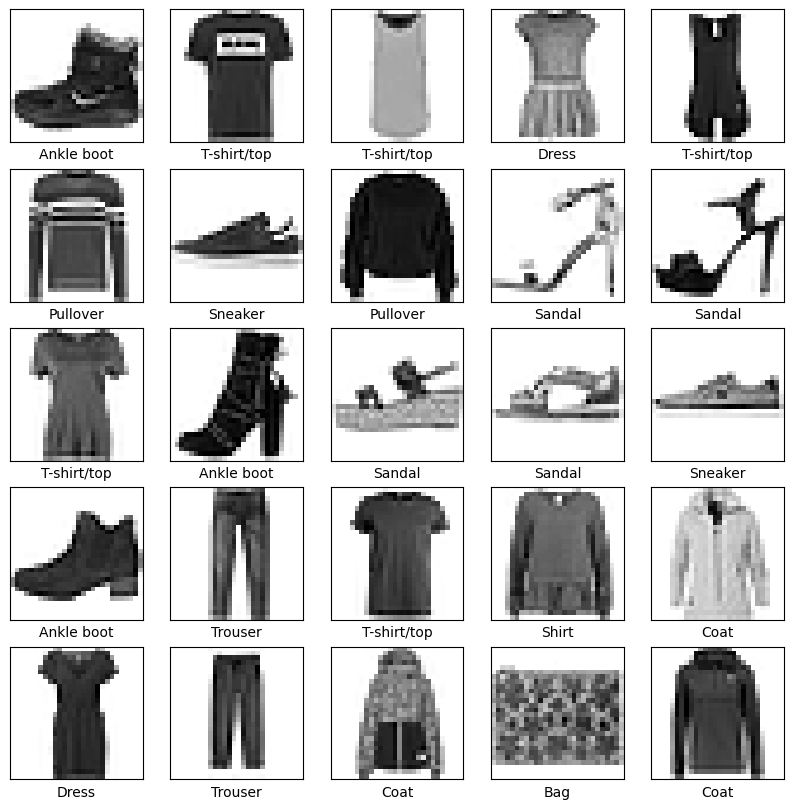

In [13]:
## To verify that the data is in the correct format and that you're ready to build and train the network, 
## let's display the first 25 images from the training set and display the class name below each image.

plt.figure(figsize = (10,10))
for i in range(25):
    #subplot(nrows, ncols, index, **kwargs)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap = plt.cm.binary)
    plt.xlabel([train_labels[i]])
plt.show()

In [14]:
train_images[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.16078431, 0.7372549 , 0.40392157, 0.21176471, 0.18823529,
        0.16862745, 0.34117647, 0.65882353, 0.52156863, 0.0627451 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.19215686, 0.53333333, 0.85882353,
        0.84705882, 0.89411765, 0.9254902 , 1.        , 1.        ,
        1.        , 1.        , 0.85098039, 0.84313725, 0.99607843,
        0.90588235, 0.62745098, 0.17647059, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05490196, 0.69019608, 0.87058824, 0.87843137, 0.83137255,
        0.79607843, 0.77647059, 0.76862745, 0.78431373, 0.84313725,
        0.8       , 0.7921

# Build the Neural Network model

Structure: For a neural network's input layer, we need to first flatten the input data into a 1-D array. The number of neurons in the input layer will be 28*28 =784 in this case. <br/>

The output layer should have one neuron for each class or label => 10 output neurons<br/>

For a NN to be able to predict the label for the input image, we need to have some hidden layer between the input and output layer. Having just one input and one output layer would mean having only one set of 784*10 weights, 784*10 biases. This might not be enough for the NN to learn the patterns in the input image data.

In [15]:
nn_model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape = (28,28)),
        tf.keras.layers.Dense(128, activation= 'relu'),
        tf.keras.layers.Dense(10, activation = 'softmax')
        ])

## NOTE: Each node/neuron in the last layer contains a score that indicates the current image belongs to one of the 10 classes.

# Compile the model
Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

1. Optimizer —This is how the model is updated based on the data it sees and its loss function.
2. Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
3. Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [16]:
# nn_model.compile(optimizer = 'adam',
#              loss = 'tf.keras.losses.SparseCategoricalCrossentropy',
#              metrics = ['accuracy'])

nn_model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

# Train and fit the model 

<b> epochs</b> in fit function for a deep learning model:<br/>
1. Complete Pass Through Dataset: During training, the model updates its parameters (weights) based on the training data. An epoch is defined as one full cycle through the entire training dataset. If you have a dataset with 10,000 samples, one epoch means that the model has processed all 10,000 samples once.

2. Training Process: During each epoch, the model's parameters are updated using each batch. After each epoch, the model can be evaluated on the training and validation datasets to track its performance.

In [19]:
nn_model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 1s 758us/step - loss: 0.2791 - accuracy: 0.8959
Epoch 2/10
1875/1875 [==============================] - 1s 770us/step - loss: 0.2675 - accuracy: 0.8996
Epoch 3/10
1875/1875 [==============================] - 1s 750us/step - loss: 0.2575 - accuracy: 0.9031
Epoch 4/10
1875/1875 [==============================] - 1s 757us/step - loss: 0.2468 - accuracy: 0.9077
Epoch 5/10
1875/1875 [==============================] - 1s 788us/step - loss: 0.2395 - accuracy: 0.9111
Epoch 6/10
1875/1875 [==============================] - 1s 774us/step - loss: 0.2301 - accuracy: 0.9138
Epoch 7/10
1875/1875 [==============================] - 1s 753us/step - loss: 0.2222 - accuracy: 0.9165
Epoch 8/10
1875/1875 [==============================] - 1s 780us/step - loss: 0.2165 - accuracy: 0.9183
Epoch 9/10
1875/1875 [==============================] - 1s 785us/step - loss: 0.2080 - accuracy: 0.9227
Epoch 10/10
1875/1875 [==============================] - 1s 759u

# Evaluate the model

In [20]:
test_loss, test_acc = nn_model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 386us/step - loss: 0.3668 - accuracy: 0.8709


In [21]:
print("Tested accuracy:", test_acc)

Tested accuracy: 0.8708999752998352


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents overfitting. <b>Overfitting</b> happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data.

# Make predictions

In [26]:
predictions = nn_model.predict(test_images)
predictions[0]

313/313 [==============================] - 0s 339us/step


array([2.7978651e-08, 4.6779963e-12, 2.9691671e-09, 7.8170006e-13,
       1.3956125e-10, 6.8848918e-04, 2.2832504e-08, 3.9159167e-03,
       1.2511866e-09, 9.9539548e-01], dtype=float32)

In [27]:
## Convert the output probabilities to the label - The index with the max probability in the output array is the predicted label
np.argmax(predictions[0])

9

In [28]:
## Print class
class_names[np.argmax(predictions[0])]

'Ankle boot'

In [38]:
len(test_images)

10000

# Validate predictions

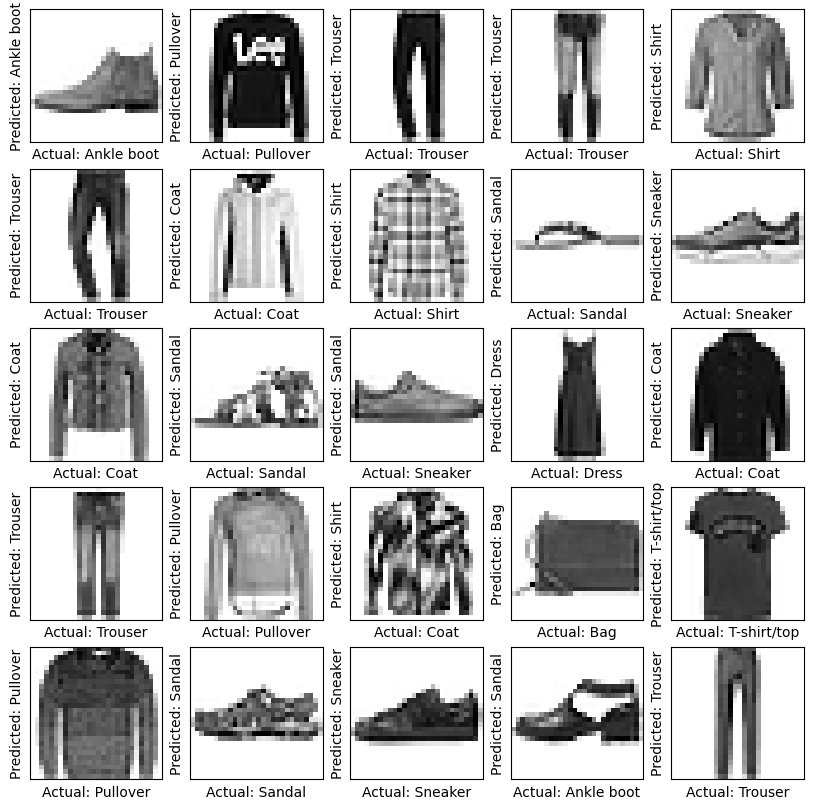

In [39]:
plt.figure(figsize = (10,10))
for j in range(25):
    plt.subplot(5,5,j+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[j],cmap = plt.cm.binary)
    plt.xlabel(f"Actual: {class_names[test_labels[j]]}")
    plt.ylabel(f"Predicted: {class_names[np.argmax(predictions[j])]}")
plt.show()
    